# # Why do employees leave a company?
Let's first load the dataset:

In [1]:
import pandas as pd

employee_data = pd.read_csv('HR_comma_sep.csv')
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
employee_data = pd.read_csv('HR_comma_sep.csv', na_values=['NA'])

Having had a first look, there seems to be no missing data in our dataset, at least with the designation 'NA'. Let's have a look at some summary statistics for our dataset:

In [3]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This is not very useful. Let's import matplotlib and seaborn to visualize the dataset.

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Let's create and visualize a correlation matrix:

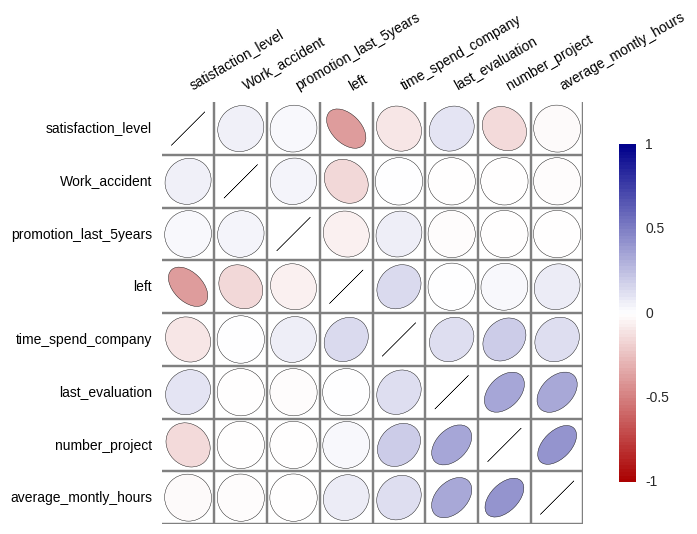

In [5]:
employee_data_corr = employee_data.corr()

from biokit.viz import corrplot
c = corrplot.Corrplot(employee_data_corr)
c.plot()

From what we can see, on average, employee satisfaction correlates negatively with leaving the company. That is, the less satisfied an employee is, the more likely they are to leave the company. We can also see a correlation between having gotten a promotion in the last 5 years and leaving, as well as having had an accident. The time spent at company correlates positiely with leaving, meaning that employees who have stayed longer at the company are more likely to leave.

On the data side, some columns are categorical, so we can initially omit those. Then we can separate the numeric ones. Let's do that:

In [6]:
# check for unique data within columns
columns_numerical = [];
uniqueness = [];
for column in employee_data:
    uniqueness.append(len(set(employee_data[column])))
    if uniqueness[-1]>10: # if more than 10 unique values, classify as numerical
        columns_numerical.append(column); # append to list
numerical_cols = employee_data[columns_numerical]
numerical_cols = numerical_cols.join(employee_data['left'])
numerical_cols.head()

,satisfaction_level,last_evaluation,average_montly_hours,left
0,0.38,0.53,157,1
1,0.80,0.86,262,1
2,0.11,0.88,272,1
3,0.72,0.87,223,1
4,0.37,0.52,159,1


Let's see how many unique values are in each column:

In [7]:
print(employee_data.columns, uniqueness)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object') [92, 65, 6, 215, 8, 2, 2, 2, 10, 3]


Good. Some of the variables are boolean (two unique values). 

Let's make boxplots to visualize each variable separately. The main objective is to understand how the different variables affect employee retention, but we can also have fun with the data by visualizing how variables affect each other, e.g. number of projects vs. satisfaction level. Let's look at which variables are int's and which ones are floats, as the former are not supported by the boxplot function.

In [8]:
intcols = employee_data.select_dtypes(include=['int']).columns;
floatcols = employee_data.select_dtypes(include=['float']).columns;
print(intcols)
print(floatcols)

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years'],
      dtype='object')
Index(['satisfaction_level', 'last_evaluation'], dtype='object')


Convert the above int columns to floats:

In [9]:
employee_data[list(intcols)] = employee_data[list(intcols)].astype('float')
employee_data[list(intcols)].head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,2.0,157.0,3.0,0.0,1.0,0.0
1,5.0,262.0,6.0,0.0,1.0,0.0
2,7.0,272.0,4.0,0.0,1.0,0.0
3,5.0,223.0,5.0,0.0,1.0,0.0
4,2.0,159.0,3.0,0.0,1.0,0.0


In [10]:
employee_data[floatcols].head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


<a id='fig:boxplot_satisfaction_level'></a>

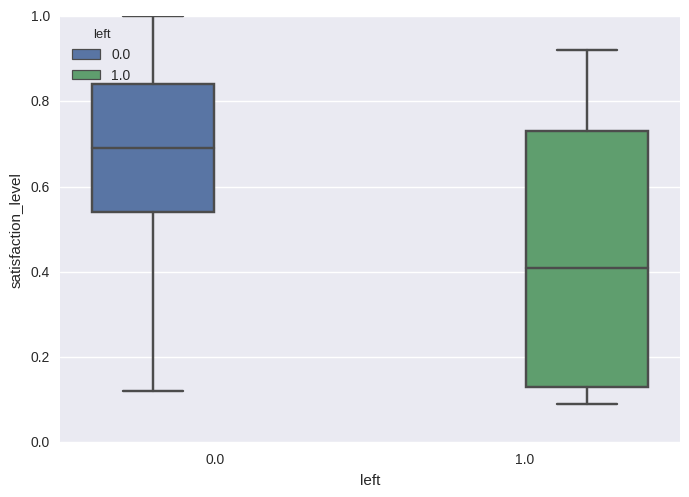

In [11]:
sb.boxplot(y=employee_data.ix[:,0],x="left",data=employee_data, hue="left")

The median satisfaction level seems to correlate well with whether an employee has left or not. 

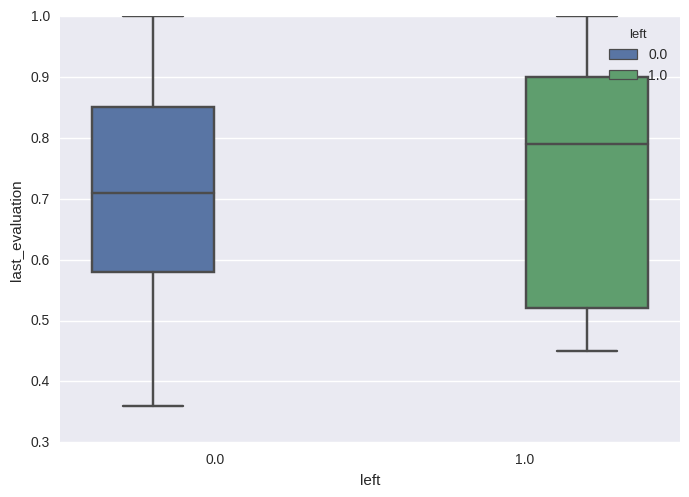

In [12]:
sb.boxplot(y=employee_data.ix[:,1],x="left",data=employee_data, hue="left")

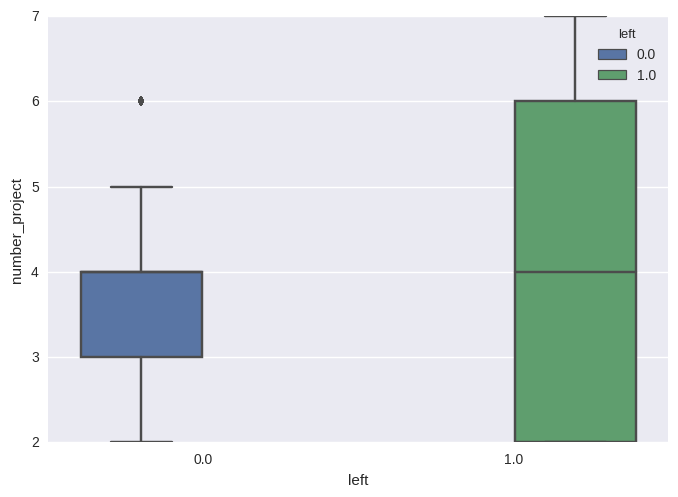

In [13]:
sb.boxplot(y=employee_data.ix[:,2],x="left",data=employee_data, hue="left")

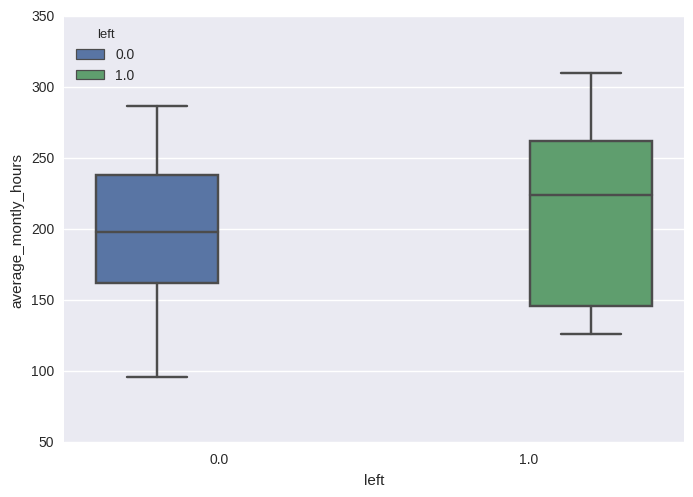

In [14]:
sb.boxplot(y=employee_data.ix[:,3],x="left",data=employee_data, hue="left")

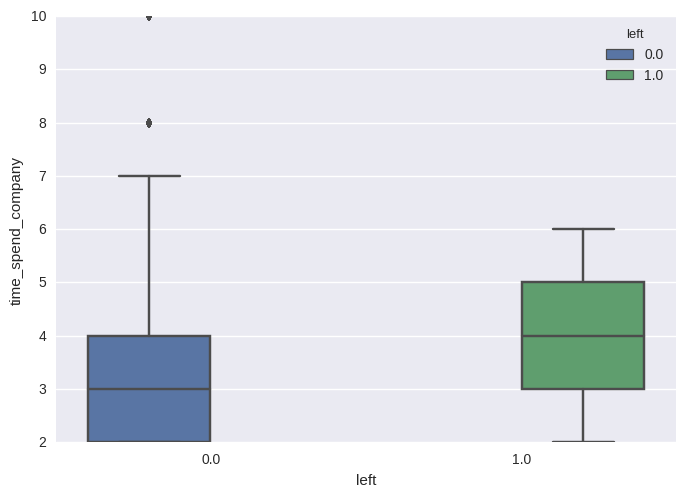

In [15]:
sb.boxplot(y=employee_data.ix[:,4],x="left",data=employee_data, hue="left")

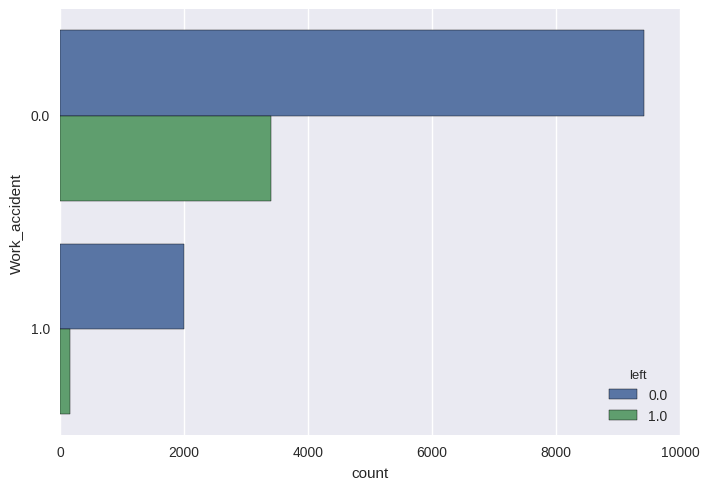

In [16]:

cntplt = sb.countplot(y=employee_data.ix[:,5],data=employee_data, hue="left")
# should make it such that counts in each category (promotion/no promotion) are normalized and appear as percentages

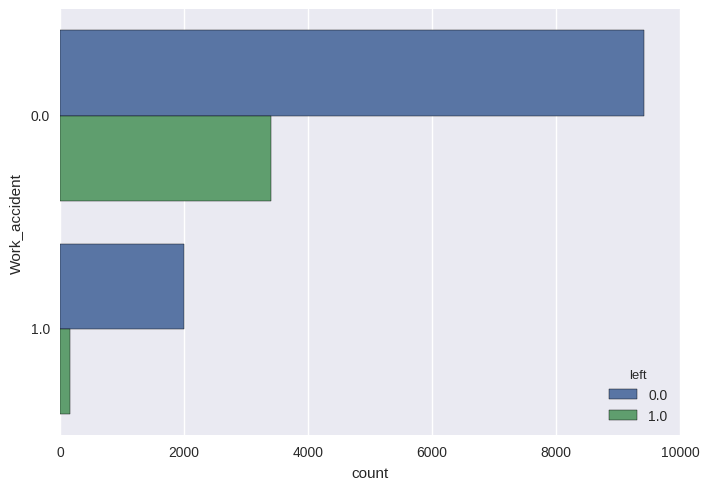

In [17]:
cntplt = sb.countplot(y=employee_data.ix[:,5], data=employee_data, hue='left')

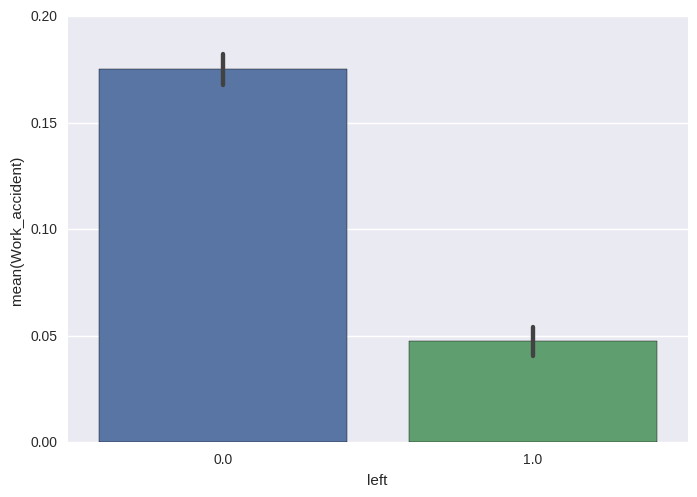

In [18]:
sb.barplot(x='left', y='Work_accident', data=employee_data)

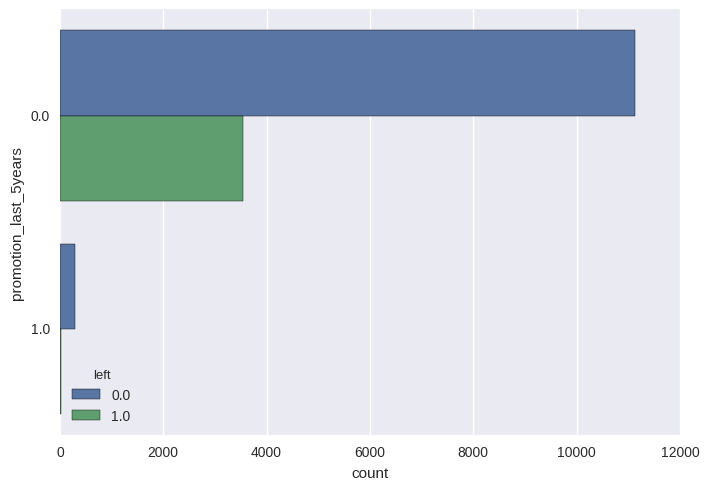

In [19]:
cntplt = sb.countplot(y=employee_data.ix[:,7],data=employee_data, hue="left")
# should make it such that counts in each category (promotion/no promotion) are normalized and appear as perrcentages

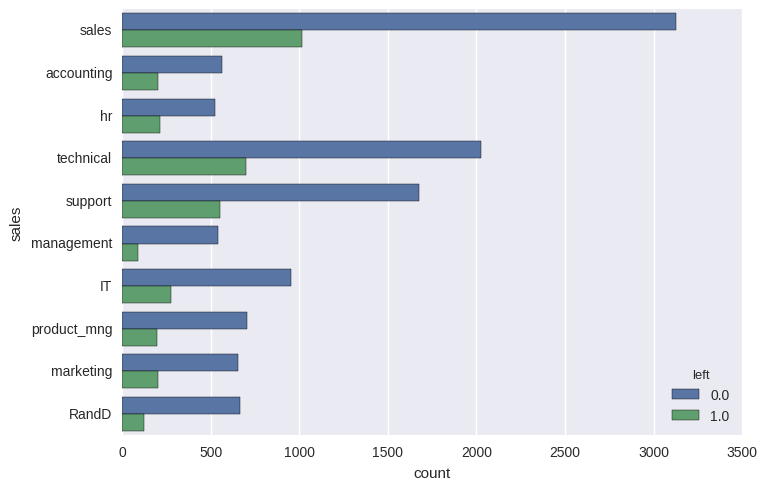

In [20]:
cntplt = sb.countplot(y=employee_data.ix[:,8],data=employee_data, hue="left")
# should make it such that counts in each category are normalized and appear as perrcentages

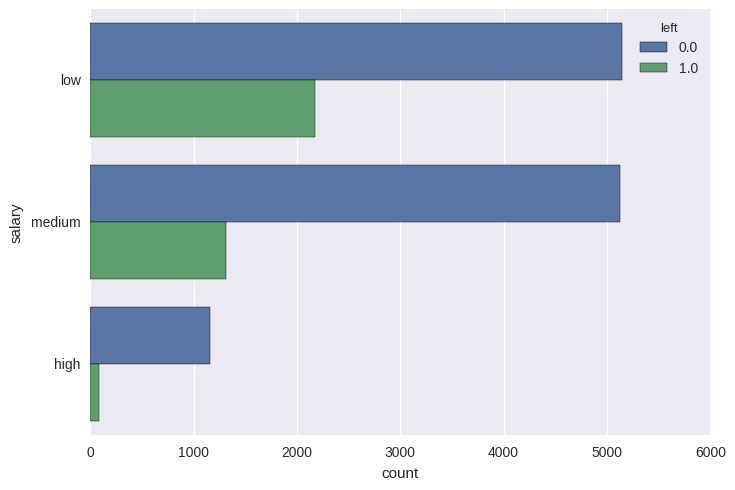

In [21]:

cntplt = sb.countplot(y=employee_data.ix[:,9],data=employee_data, hue="left")
# should make it such that counts in each category are normalized and appear as perrcentages

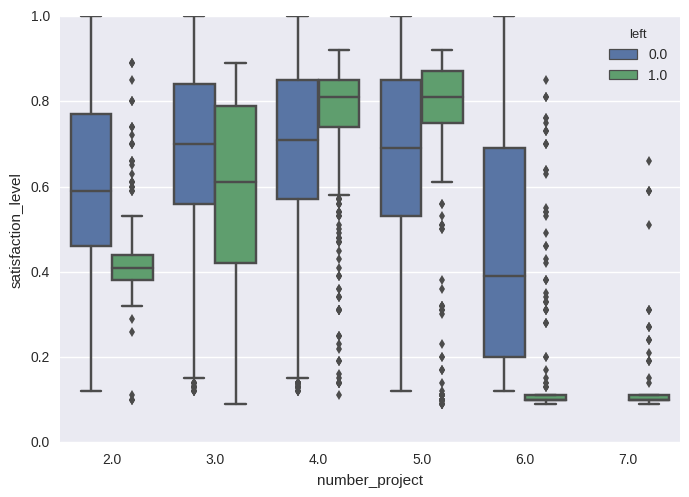

In [22]:
sb.boxplot(y="satisfaction_level",x="number_project",data=employee_data, hue="left")

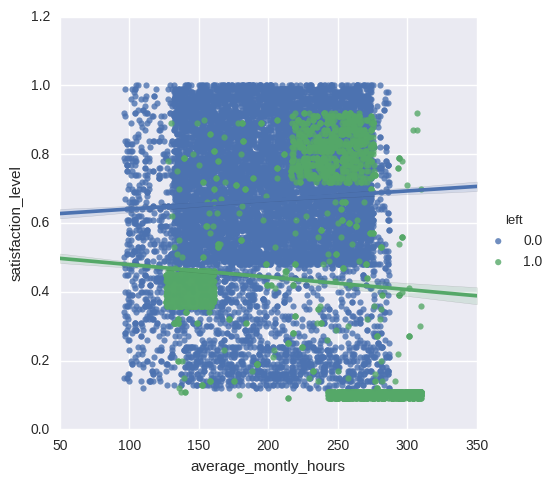

In [23]:
sb.lmplot(y="satisfaction_level",x="average_montly_hours",data=employee_data, hue="left")

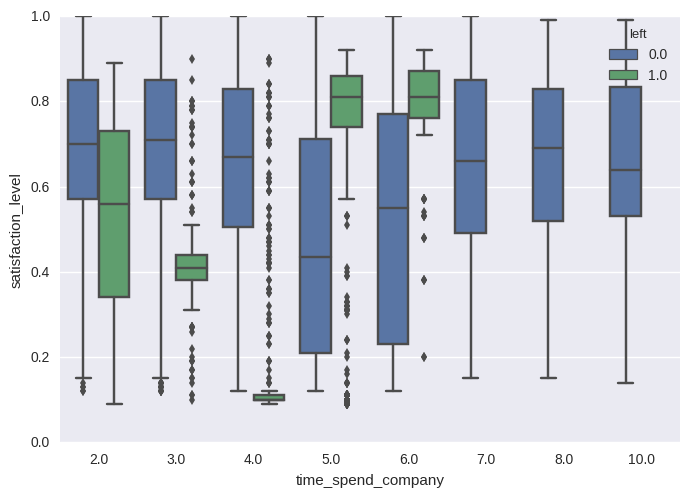

In [24]:
sb.boxplot(y="satisfaction_level",x="time_spend_company",data=employee_data, hue="left")

# Formatting our data to be used with a decision tree classifier

In [25]:
# Convert categorical data to 'category' type instead of string
employee_data['sales'] = employee_data['sales'].astype('category')
employee_data['salary'] = employee_data['salary'].astype('category')

# Get the code associated with each category
employee_data['sales'] = employee_data['sales'].cat.codes
employee_data['salary'] = employee_data['salary'].cat.codes


employee_data.to_csv('Hr_comma_sep_clean.csv', sep=',', index=False)
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,7,1
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,7,2
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,7,2
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,7,1
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,7,1


# Setting up our data for training.

In [26]:
# We can extract the data in this format from pandas like this:
inputs_idx = list(range(employee_data.shape[1])) # indices of input columns
inputs_idx.pop(employee_data.columns.get_loc("left")) # get rid of class column 'left' ('5' is not the index but the actual element we want to pop)
all_inputs = employee_data.ix[:,inputs_idx].values # extract values for input data

# Similarly, we can extract the classes
left = employee_data['left'].values

print(all_inputs,left) # we need to see what we've done!

# a = [-2,1,5,3,8,5,6]
# b = [1,2,5]
# c = [ a[i] for i in b]

[[ 0.38  0.53  2.   ...,  0.    7.    1.  ]
 [ 0.8   0.86  5.   ...,  0.    7.    2.  ]
 [ 0.11  0.88  7.   ...,  0.    7.    2.  ]
 ..., 
 [ 0.37  0.53  2.   ...,  0.    8.    1.  ]
 [ 0.11  0.96  6.   ...,  0.    8.    1.  ]
 [ 0.37  0.52  2.   ...,  0.    8.    1.  ]] [ 1.  1.  1. ...,  1.  1.  1.]


Let's split our data now.

There are several parameters that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# initialize the variables
numRuns = 1000;
feat_imp_ = np.zeros((numRuns, 9));
accuracy = [];

# repeat training and testing of the decision tree algorithm,
# each time with a separate training set (without using stratification)
for run in range(numRuns):
    
    # split the data into subsets for training and testing
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, left, train_size=0.2, random_state=1)
 
    model_accuracies = []

    # Create the regressor
    decision_tree_regressor = DecisionTreeRegressor()

    # Train the regressor on the training set
    decision_tree_regressor.fit(training_inputs, training_classes)
    # Save the feature importances
    feat_imp_[run,:] = decision_tree_regressor.feature_importances_.transpose(); #nd.array
    prediction = decision_tree_regressor.predict(testing_inputs)
    accuracy.append(1 - sum(abs(prediction - testing_classes))/len(prediction))
    
feat_imp_df = pd.DataFrame(feat_imp_)
headings = employee_data.columns.tolist();
headings.remove('left');
feat_imp_df.columns = headings;


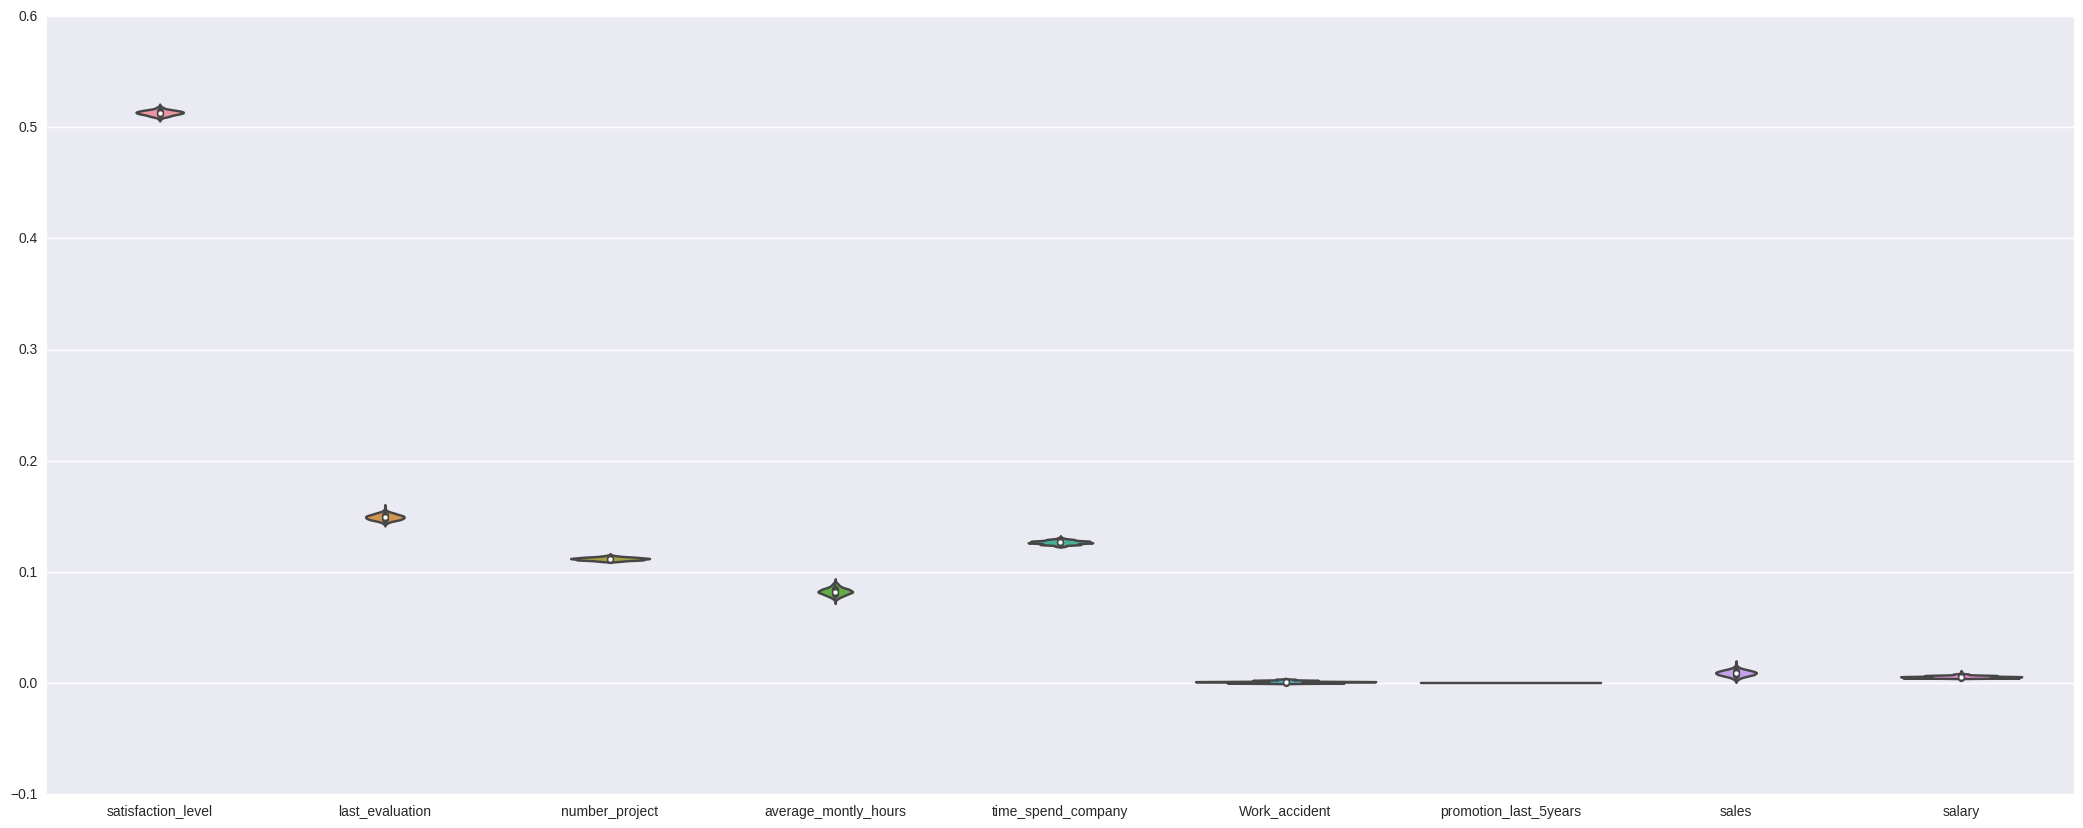

In [28]:
ax = sb.factorplot(data=feat_imp_df, kind="violin",size=3, aspect=7)
ax.fig.set_figheight(10)


As expected from the <a href='#fig:boxplot_satisfaction_level'>boxplot'</a> above, the satisfaction level seems to predict employee retention well. 

/home/orphefs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


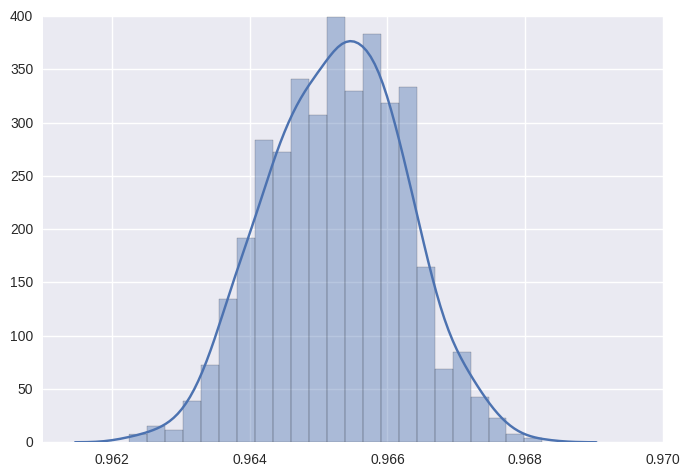

In [29]:
sb.distplot(accuracy)

Wow! That's some good accuracy. However, we have not made sure that in every run a different subset of the data is used, with the same proportions of the dichotomous class 'left'. To tackle this we can use stratified k-fold cross validation. From http://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation: "Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds)."

/home/orphefs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


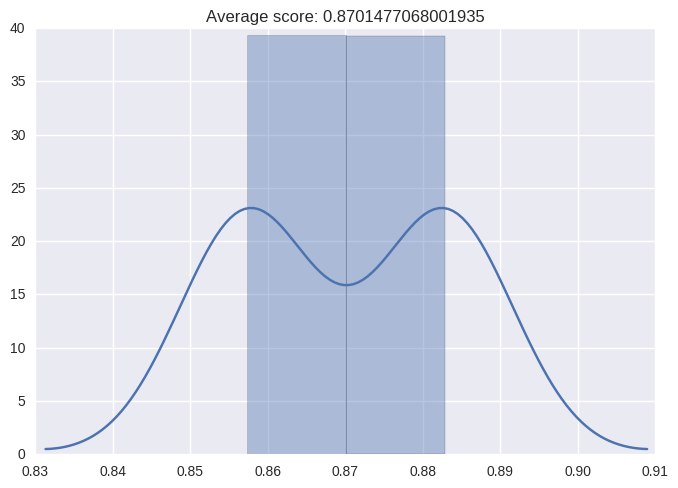

In [30]:
from sklearn.cross_validation import cross_val_score

decision_tree_regressor = DecisionTreeRegressor(max_depth=7)

    # cross_val_score returns a list of the scores, which we can visualize
    # to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_regressor, all_inputs, left, cv=2)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


2 time stratification works best. A higher number seems to decrease accuracy a lot. That may be due to small data set size. Let's check how the depth of the decision treet affects the score:

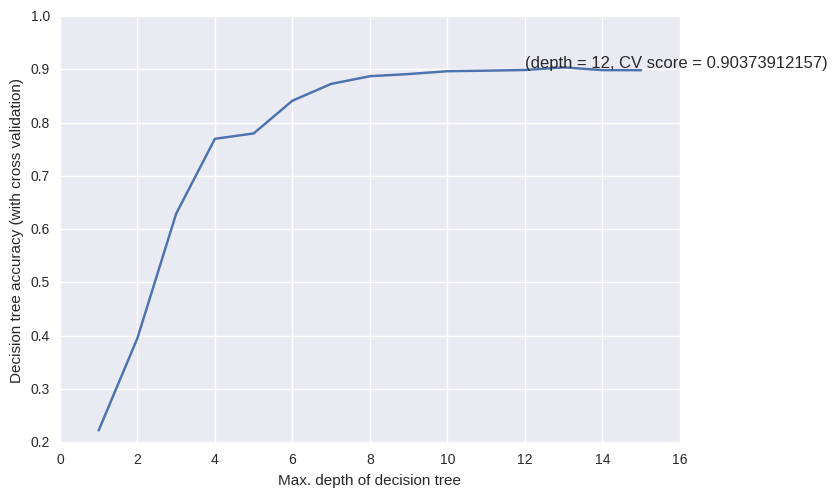

In [31]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold


numRuns = 15;
c_mean_scores = [];
for run in range(numRuns):
    decision_tree_regressor = DecisionTreeRegressor(max_depth=(run+1), max_features=5)

    # cross_val_score returns a list of the scores, which we can visualize
    # to get a reasonable estimate of our classifier's performance
    cross_validation = StratifiedKFold(left, n_folds=20)
    cv_scores = cross_val_score(decision_tree_regressor, all_inputs, left, cv=cross_validation)
#sb.distplot(cv_scores)
#plt.title('Average score: {}'.format(np.mean(cv_scores)))
    c_mean_scores.append(np.mean(cv_scores))

    # index_min = min(xrange(len(values)), key=values.__getitem__) # fast way of getting min value index
    
# convert list to np.array
c_mean_scores = np.array(c_mean_scores);
optimal_max_depth = c_mean_scores.argmax();
xy = (optimal_max_depth, max(c_mean_scores));

import matplotlib.pyplot as plt

plt.plot([(i+1) for i in range(numRuns)], c_mean_scores)
plt.xlabel("Max. depth of decision tree")
plt.ylabel("Decision tree accuracy (with cross validation)")
#plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.annotate('(depth = %s, CV score = %s)' % xy, xy=xy, textcoords='data')

Well, it seems like our decision tree classifier performs better when the depth is {{optimal_max_depth}} . Let's run a grid search to see which decision tree settings affect our accuracy:

In [32]:
from sklearn.grid_search import GridSearchCV

decision_tree_regressor = DecisionTreeRegressor()


parameter_grid = {'max_depth': [(i+1) for i in range(40)],
                  'max_features': [(i+1) for i in range(9)]}

cross_validation = StratifiedKFold(left, n_folds=10)

grid_search = GridSearchCV(decision_tree_regressor,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, left)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9110448212648472
Best parameters: {'max_features': 6, 'max_depth': 37}


The optimum maximum number of features is 5, with an optimum maximum tree depth of 39. Let's visualize our grid:

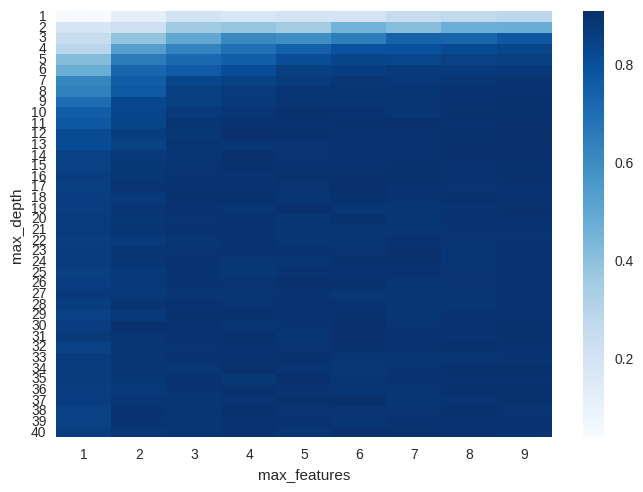

In [33]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (40, 9)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(40) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')